In [2]:
import pandas as pd
data = pd.read_csv('fer2013.csv')
data.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
unique_val = data["Usage"].unique
print(unique_val)

<bound method Series.unique of 0           Training
1           Training
2           Training
3           Training
4           Training
            ...     
35882    PrivateTest
35883    PrivateTest
35884    PrivateTest
35885    PrivateTest
35886    PrivateTest
Name: Usage, Length: 35887, dtype: object>


In [4]:
import matplotlib.pyplot as plt
import numpy as np

train_pixels = (data[data["Usage"]=="Training"]["pixels"]).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)


In [5]:
train_pixels = train_pixels.reshape((-1, 48, 48, 1))
train_pixels = train_pixels.astype("float32") / 255
Y_train=list(data[data["Usage"]=="Training"]["emotion"])

X_test=data[data["Usage"]=="PrivateTest"]["pixels"].str.split(" ").tolist()
X_test = np.uint8(X_test)
X_test = X_test.reshape((-1, 48, 48, 1))
X_test = X_test.astype("float32") / 255
Y_test=list(data[data["Usage"]=="PrivateTest"]["emotion"])




(48, 48, 1)

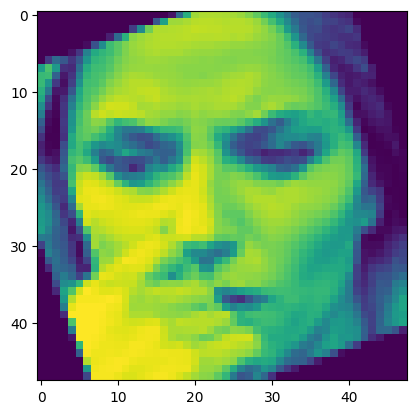

In [6]:
import cv2
import numpy as np

def rotate_augmentation(image, angle=20):
    rows, cols, _ = image.shape
    rot_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    result = cv2.warpAffine(image, rot_matrix, (cols, rows))
    return result

image = train_pixels[2]
rotated_image = rotate_augmentation(image, 20)
rotated_image = np.expand_dims(rotated_image, axis=-1)
plt.imshow(rotated_image)
rotated_image.shape

(48, 48, 1)
(72, 72)
(48, 48, 1)


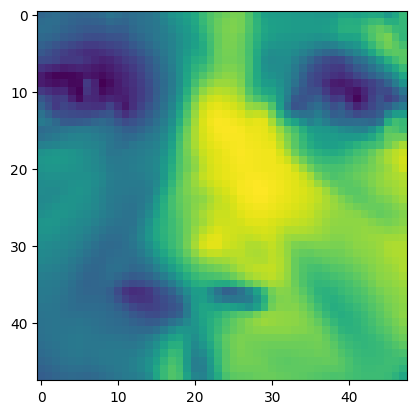

In [7]:
import cv2
import numpy as np

def zoom_augmentation(image, scale_factor=1.1):
    print(image.shape)
    rows, cols,_ = image.shape
    image = cv2.resize(image, (0,0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    print(image.shape)
    image = np.expand_dims(image, axis=-1)
    height, width,_ = image.shape
    y = (height - rows) // 2
    x = (width - cols) // 2
    res=image[y:y+rows, x:x+cols]
    print(res.shape)
    return res

image = train_pixels[6]

zoomed_image = zoom_augmentation(image, 1.5)
plt.imshow(zoomed_image)

In [8]:
from tensorflow.keras.utils import to_categorical
Y_train_oe=to_categorical(Y_train,num_classes=7)
Y_test_oe=to_categorical(Y_test,num_classes=7)

2023-02-22 10:57:46.009295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 10:57:49.555057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/slava_oswald/exosql/myenv/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-22 10:57:49.555105: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-22 10:57:58.774576: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.s

In [9]:
def translate(img, shift=10, direction='right', roll=True):
    assert direction in ['right', 'left', 'down', 'up'], 'Directions should be top|up|left|right'
    new_img = img.copy()
    if direction == 'right':
        right_slice = img[:, -shift:].copy()
        new_img[:, shift:] = new_img[:, :-shift]
        if roll:
            img[:,:shift] = np.fliplr(right_slice)
    if direction == 'left':
        left_slice = img[:, :shift].copy()
        new_img[:, :-shift] = new_img[:, shift:]
        if roll:
            new_img[:, -shift:] = left_slice
    if direction == 'down':
        down_slice = img[-shift:, :].copy()
        new_img[shift:, :] = new_img[:-shift,:]
        if roll:
            new_img[:shift, :] = down_slice
    if direction == 'up':
        upper_slice = img[:shift, :].copy()
        new_img[:-shift, :] = new_img[shift:, :]
        if roll:
            new_img[-shift:,:] = upper_slice
    return new_img


In [10]:
import random
random_indices = []
i = 0
indices = random.sample(range(0,train_pixels.shape[0]),8000)
indices2 = random.sample(range(0,X_test.shape[0]),2000)
indices3 = random.sample(range(0,train_pixels.shape[0]),10000)
indices4 = random.sample(range(0,train_pixels.shape[0]),20000)



In [12]:
train_aug_pixels=[list(val) for val in train_pixels]

y_train_aug=list(Y_train_oe.copy())
for i in indices:     
    activated = translate(train_pixels[i])
    train_aug_pixels.append(activated)
    y_train_aug.append(Y_train_oe[i]) 
     

In [12]:
print(train_pixels[0])

[[[0.16078432]
  [0.16862746]
  [0.20392157]
  ...
  [0.20392157]
  [0.16862746]
  [0.16078432]]

 [[0.17254902]
  [0.20392157]
  [0.21960784]
  ...
  [0.21960784]
  [0.20392157]
  [0.17254902]]

 [[0.18431373]
  [0.21960784]
  [0.19215687]
  ...
  [0.19215687]
  [0.21960784]
  [0.18431373]]

 ...

 [[0.16862746]
  [0.21960784]
  [0.28235295]
  ...
  [0.28235295]
  [0.21960784]
  [0.16862746]]

 [[0.18039216]
  [0.27450982]
  [0.4117647 ]
  ...
  [0.4117647 ]
  [0.27450982]
  [0.18039216]]

 [[0.32156864]
  [0.42745098]
  [0.41568628]
  ...
  [0.41568628]
  [0.42745098]
  [0.32156864]]]


In [13]:
train_rotated_pixels=[list(val) for val in train_aug_pixels]

y_train_rotated=list(y_train_aug.copy())
for i in indices3:     
    rotated = rotate_augmentation(train_pixels[i], 30)
    rotated = np.expand_dims(rotated, axis=-1)
    train_rotated_pixels.append(rotated)
    y_train_rotated.append(Y_train_oe[i]) 

In [14]:
print(train_aug_pixels[0])

[array([[0.27450982],
       [0.3137255 ],
       [0.32156864],
       [0.28235295],
       [0.22745098],
       [0.22745098],
       [0.23529412],
       [0.24705882],
       [0.21176471],
       [0.22745098],
       [0.23529412],
       [0.1882353 ],
       [0.34901962],
       [0.4509804 ],
       [0.4745098 ],
       [0.46666667],
       [0.4509804 ],
       [0.43137255],
       [0.38431373],
       [0.35686275],
       [0.32941177],
       [0.32941177],
       [0.3529412 ],
       [0.3882353 ],
       [0.43137255],
       [0.49411765],
       [0.56078434],
       [0.6       ],
       [0.61960787],
       [0.67058825],
       [0.6627451 ],
       [0.6745098 ],
       [0.6627451 ],
       [0.64705884],
       [0.5058824 ],
       [0.43137255],
       [0.44313726],
       [0.41960785],
       [0.37254903],
       [0.30980393],
       [0.25882354],
       [0.24313726],
       [0.21960784],
       [0.22352941],
       [0.23921569],
       [0.20392157],
       [0.16862746],
       [0.16

In [15]:
train_rotated_zoomed_pixels=[list(val) for val in train_rotated_pixels]

y_train_zoomed=list(y_train_rotated.copy())
for i in indices4:     
    zoomed = zoom_augmentation(train_pixels[i], 1.5)
    # zoomed = np.expand_dims(zoomed, axis=-1)
    train_rotated_zoomed_pixels.append(zoomed)
    y_train_zoomed.append(y_train_rotated[i]) 

(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1)
(72, 72)
(48, 48, 1)
(48, 48, 1

In [16]:

res=np.reshape(train_pixels[i].tolist(), (-1,48,48,1))
res.shape

(1, 48, 48, 1)

In [17]:

tt=np.reshape(train_rotated_zoomed_pixels, (-1,48,48,1))
tt.shape

(66709, 48, 48, 1)

In [18]:
train_rotated_zoomed_pixels=np.reshape(train_rotated_zoomed_pixels,(-1,48,48,1))

In [19]:
test_aug_pixels=[list(val) for val in X_test]
y_test_aug=list(Y_test_oe.copy())
for i in indices2:     
    activated = translate(X_test[i])
    test_aug_pixels.append(activated)
    y_test_aug.append(Y_test_oe[i]) 

In [20]:
test_aug_pixels_form=np.reshape(test_aug_pixels,(len(test_aug_pixels),48,48,1))

In [46]:

from keras import datasets, layers, models
from keras.layers import BatchNormalization, Dropout, GaussianNoise

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(layers.Conv2D(254, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(layers.Flatten())
model.add(layers.Dense(254, activation='relu'))
model.add(BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.1))
model.add(Dropout(0.15))

model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.1))
model.add(Dropout(0.15))

model.add(layers.Dense(7,activation='softmax'))


In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_42 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_43 (Bat  (None, 21, 21, 64)      

In [43]:
import tensorflow as tf

In [44]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF

# early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, mode='min') #, min_lr=1e-6

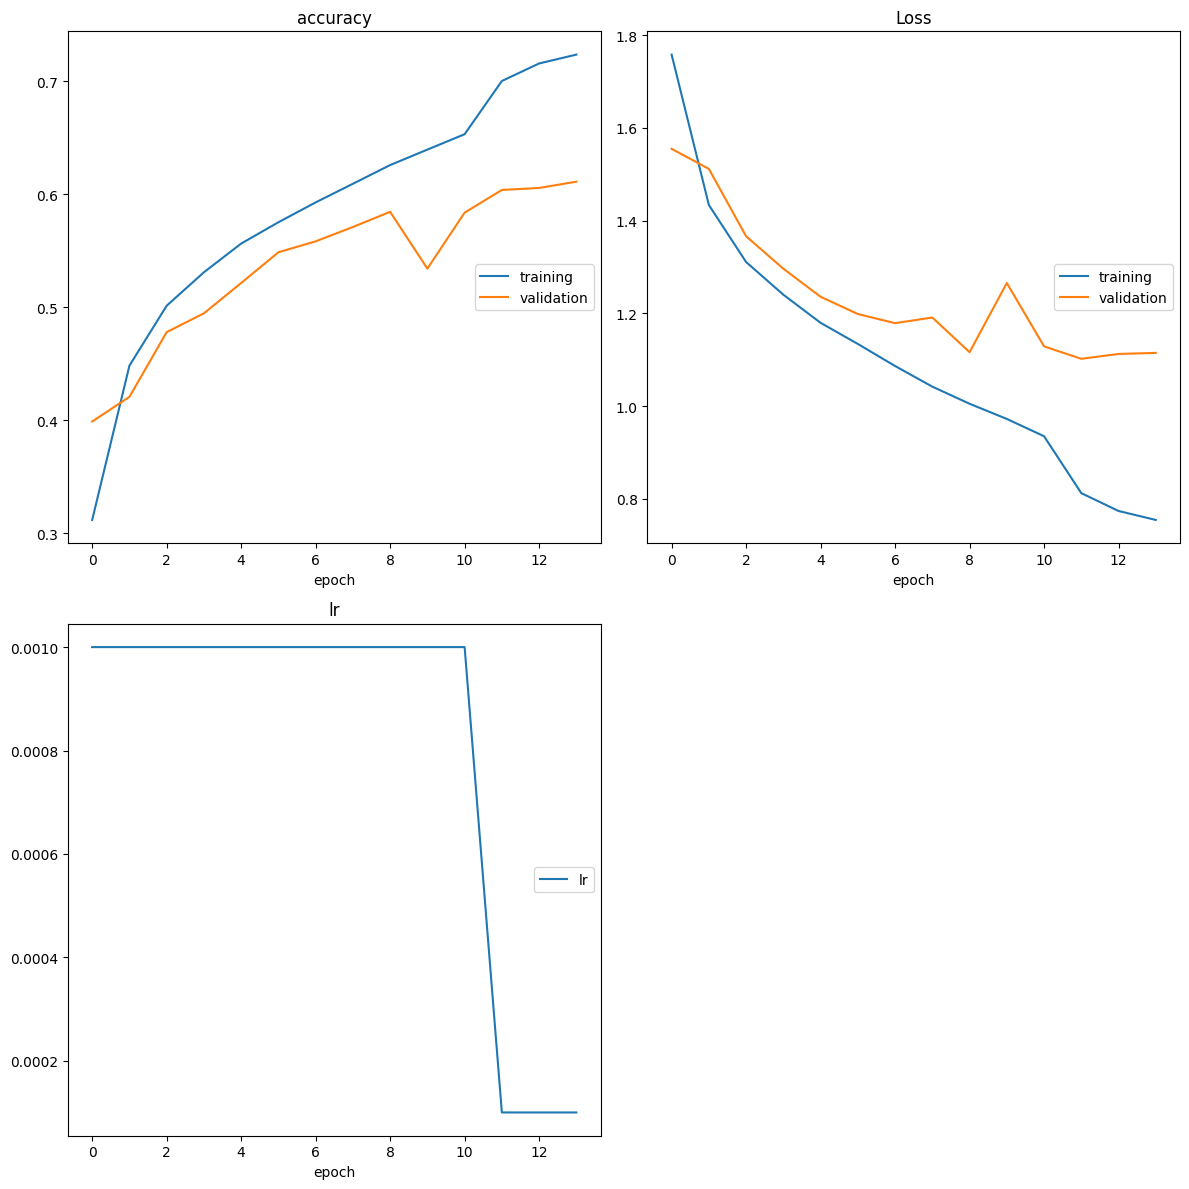

accuracy
	training         	 (min:    0.312, max:    0.723, cur:    0.723)
	validation       	 (min:    0.399, max:    0.611, cur:    0.611)
Loss
	training         	 (min:    0.754, max:    1.758, cur:    0.754)
	validation       	 (min:    1.102, max:    1.555, cur:    1.115)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
2085/2085 [==============================] - 243s 116ms/step - loss: 0.7542 - accuracy: 0.7235 - val_loss: 1.1147 - val_accuracy: 0.6110 - lr: 1.0000e-04


In [47]:
from keras.optimizers import Adam
optz = Adam(lr=0.0005)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(tt, np.uint8(y_train_zoomed), validation_data=(test_aug_pixels_form, np.uint8(y_test_aug)), callbacks=[reduce_lr, PlotLossesKerasTF()] ,epochs=14)#,validation_data=(test_pixels, Y_test_final), callbacks=[reduce_lr])


175/175 [==============================] - 7s 36ms/step


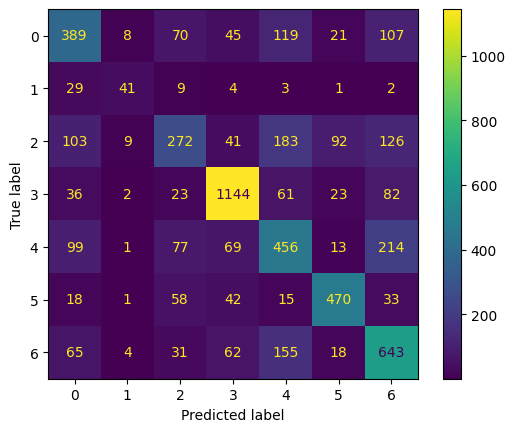

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(test_aug_pixels_form)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.uint8(y_test_aug), axis=1)
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               )
disp.plot()
plt.show()


In [49]:
model.save('model.h5')